# Generate networks for simulations

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random

In [2]:
outdir = './networks/'
if not os.path.exists(outdir):
    os.makedirs(outdir)

#### complete graph

In [3]:
CG = nx.complete_graph(100)

In [4]:
nnodes = len(CG.nodes)
outfile = open("./%s/CG_N%d.txt"%(outdir, nnodes), 'wb')
nx.write_edgelist(CG, outfile)

#### random graph

In [5]:
random.seed(42)
ER = nx.erdos_renyi_graph(n=10000, p=0.001) # ~10 links per node

In [6]:
nnodes = len(ER.nodes)
nedges = len(ER.edges)
av_degree = 2*nedges/nnodes
outfile = open("./%s/ER_N%d_<k>%d.txt"%(outdir, nnodes, round(av_degree)), 'wb')
nx.write_edgelist(ER, outfile)

#### stochastic block model - hierarchical graph

In [7]:
ncom = 9                            # number of communities
sizes=[1111 for i in range(ncom)]   # size of each community
probs = np.zeros((ncom,ncom))       # connection probabilities between nodes of different communities
min_val = 0.0001
for r in range(ncom):
    for c in range(r+1):
        probs[r,c] = max(np.random.normal(0.0000015, 0.0000001), min_val)
        probs[c,r] = probs[r,c]
        if r==c:
            probs[r,c] = max(np.random.normal(0.007, 0.001), min_val)
        elif np.floor(r/3) == np.floor(c/3):
            probs[r,c] = max(np.random.normal(0.0009, 0.0001), min_val)
            probs[c,r] = probs[r,c]

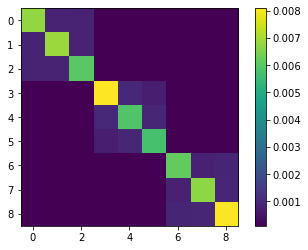

In [8]:
# plot connection probabilities
plt.imshow(probs, cmap='viridis')
plt.colorbar()

In [9]:
# create the SBM graph
random.seed(42)
SBM = nx.stochastic_block_model(sizes=sizes, p=probs)

10.071007100710071


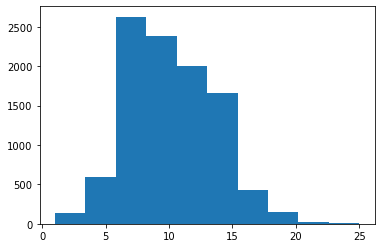

In [10]:
# check the mean degree
degrees = [j for (i,j) in SBM.degree]
print (np.mean(degrees))
plt.hist(degrees)
plt.show()

In [11]:
nnodes = len(SBM.nodes)
nedges = len(SBM.edges)
av_degree = 2*nedges/nnodes
outfile = open("./%s/SBM_N%d_<k>%d.txt"%(outdir, nnodes, round(av_degree)), 'wb')
nx.write_edgelist(SBM, outfile)